# Linearna regresija - vježba
U ovoj Jupyter bilježnici bit će zadani zadatci na kojima će se testirati model linearne regresije

## Dijabetes - zadatak 1

U ovom zadatku primjeniti ćemo model linearne regresije na skup podataka o dijabetesu. Skup sadrži $442$ podatka. Svaki je podatak prikazan 10-dimenzionalnim vektorom značajki, a oznake su mjere stanja pacijenta nakon godinu dana od otkrivanja dijabetesa. Za početak ćemo učitati skup podataka, te se upoznati s značajkama s kojima radimo.


In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt


In [2]:
diabetes = load_diabetes()

X = diabetes.data
y = diabetes.target

feature_names = diabetes.feature_names

print(feature_names)
print(diabetes.DESCR)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides lev

Za početak počnimo sa *baseline* modelom obične linearne regresije. On će nam služiti kao polazišna točka u odnosu na koju ćemo gledati uspjeh naprednijih modela.

train error: 2878.749837473935
test error: 2867.9122903197463
test r2 score: 0.40784108080104997
train r2 score: 0.5356999130934378
3025


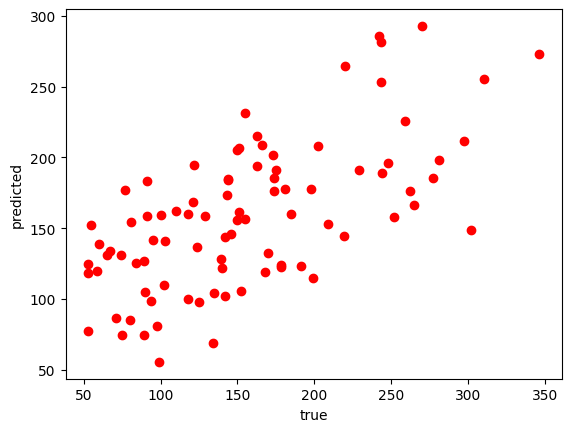

In [23]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

model = LinearRegression()

model.fit(x_train, y_train)
y_train_predict = model.predict(x_train)
y_test_predict = model.predict(x_test)

err_train = np.mean((y_train_predict - y_train) ** 2)
err_test = np.mean((y_test_predict - y_test) ** 2)

print(f'train error: {err_train}')
print(f'test error: {err_test}')
print(f'test r2 score: {r2_score(y_test, y_test_predict)}')
print(f'train r2 score: {r2_score(y_train, y_train_predict)}')

plt.scatter(
  y_test,
  y_test_predict,
  c='red'
)


plt.scatter(
  y_train,
  y_train_predict,
  c='blue'
)


plt.ylabel('predicted')
plt.xlabel('true')


Probajmo preslikati podatke polinomijalnim preslikavanjem

1
2


3


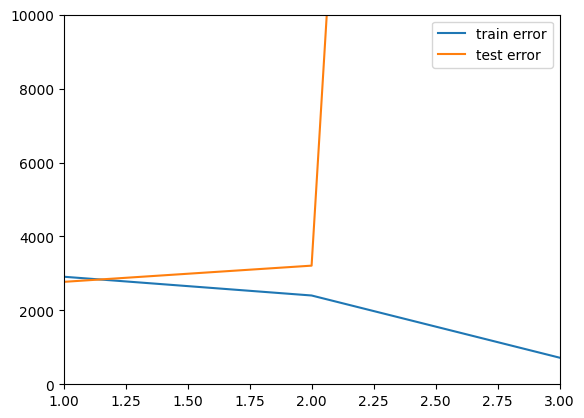

In [5]:
ds = [i for i in range(1, 4)]
errs_train = []
errs_test = []

for d in ds:
    print(d)
    poly = PolynomialFeatures(d, include_bias=False)

    x_train_trans = poly.fit_transform(x_train)
    x_test_trans = poly.fit_transform(x_test)

    model = LinearRegression()
    model.fit(x_train_trans, y_train)

    y_train_predict = model.predict(x_train_trans)
    y_test_predict = model.predict(x_test_trans)
    
    errs_train.append(
        np.mean((y_train_predict - y_train) ** 2)
    )
    errs_test.append(
        np.mean((y_test_predict - y_test) ** 2)
    )

plt.plot(
    ds,
    errs_train,
    label='train error'
)

plt.plot(
    ds,
    errs_test,
    label='test error'
)

plt.axis([ds[0],ds[-1], 0, 10000])

plt.legend()
plt.show()

Vidimo da povećanjem kapaciteta modela, testna greška strelovito raste dok se greška na skupu za učenje smanjuje. Model očigledno počinje učiti šum. Čak ni polinomijalno preslikavanje stupnja dva nije rezultiralo poboljšanjem modela. Na temelju toga možemo probati iskorsititi neki regularizirani model. Ideja je sljedeća, možda neke značajke ne pridonose regresiji, već su šum, koji se uči i koji samo "zbunjuje naš model".

In [6]:
model = Lasso(alpha=0.002)

model.fit(x_train, y_train)

y_train_predict = model.predict(x_train)
y_test_predict = model.predict(x_test)

err_train = np.mean((y_train_predict - y_train) ** 2)
err_test = np.mean((y_test_predict - y_test) ** 2)

print(f'train error: {err_train}')
print(f'test error: {err_test}')
print(model.coef_)

train error: 2910.8877490112914
test error: 2766.9207990365107
[  48.38903229 -180.6373051   540.14309136  301.78993775 -662.9059321
  342.7898924   113.61774933  224.32636001  711.39027502   77.48258563]


Vidimo da nažalost ni ova metoda nije puno, (a možda ni uopće unaprijedila naš model). Zato ćemo probati kombinirati ova dva pristupa. Napraviti ćemo polinomijalnu transformaciju stupnja 2, i primjeniti lasso regularizaciju.

In [7]:
model = Lasso(alpha=0.005)

poly = PolynomialFeatures(2, include_bias=False)

x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.fit_transform(x_test)

model.fit(x_train_trans, y_train)

y_train_predict = model.predict(x_train_trans)
y_test_predict = model.predict(x_test_trans)

err_train = np.mean((y_train_predict - y_train) ** 2)
err_test = np.mean((y_test_predict - y_test) ** 2)

print(f'train error: {err_train}')
print(f'test error: {err_test}')
print(f'test r2 score: {r2_score(y_test, y_test_predict)}')


train error: 2698.3988536711067
test error: 2660.6445343973933
test r2 score: 0.49312855909207765


In [8]:
model = Ridge(alpha=0.002)

poly = PolynomialFeatures(2, include_bias=False)

x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.fit_transform(x_test)

model.fit(x_train_trans, y_train)

y_train_predict = model.predict(x_train_trans)
y_test_predict = model.predict(x_test_trans)

err_train = np.mean((y_train_predict - y_train) ** 2)
err_test = np.mean((y_test_predict - y_test) ** 2)

print(f'train error: {err_train}')
print(f'test error: {err_test}')
print(f'test r2 score: {r2_score(y_test, y_test_predict)}')


train error: 2647.3509703957207
test error: 2647.470605190687
test r2 score: 0.4956382849848431


Vidimo da se regularizirani modeli u pravilu ponašaju malo bolje, to naravno ovisi o nasumičnoj raspodijeli na skup za učenje i skup za treniranje tako da je potrebno više puta pokrenuti model i uzeti prosječne vrijednosti prije donošenja čvrste odluke.

Sada ćemo se 

In [9]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

 pogreška na testnom skupu 0.5114287000192281
r: 0.6065774855600865


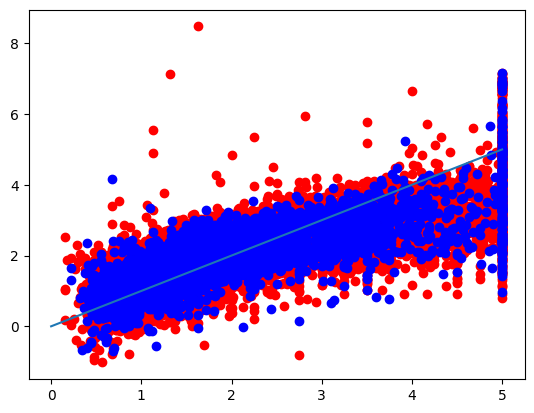

In [91]:
x_train, x_test, y_train, y_test = train_test_split(housing.data, housing.target, train_size=0.8)

model = LinearRegression()

model.fit(x_train, y_train)

print(f' pogreška na testnom skupu {mean_squared_error(y_test, model.predict(x_test))}')
print(f'r: {model.score(x_test, y_test)}')

plt.scatter(
    y_train,
    model.predict(x_train),
    c='red'
)

plt.scatter(
    y_test,
    model.predict(x_test),
    c='blue'
)
plt.plot(
  np.linspace(0,5,100),
  np.linspace(0,5,100)
)

1
2
3


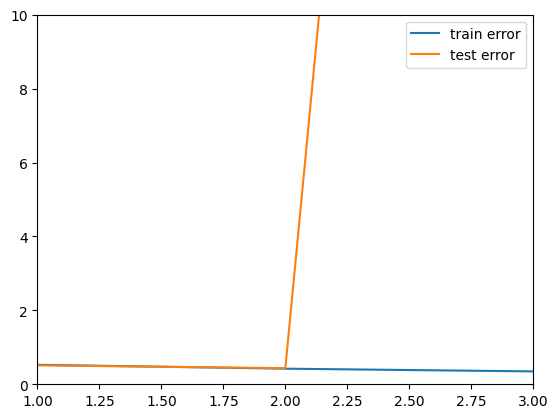

In [92]:
ds = [i for i in range(1, 4)]
errs_train = []
errs_test = []

for d in ds:
    print(d)
    poly = PolynomialFeatures(d, include_bias=False)

    x_train_trans = poly.fit_transform(x_train)
    x_test_trans = poly.fit_transform(x_test)

    model = LinearRegression()
    model.fit(x_train_trans, y_train)

    y_train_predict = model.predict(x_train_trans)
    y_test_predict = model.predict(x_test_trans)
    
    errs_train.append(
        np.mean((y_train_predict - y_train) ** 2)
    )
    errs_test.append(
        np.mean((y_test_predict - y_test) ** 2)
    )

plt.plot(
    ds,
    errs_train,
    label='train error'
)

plt.plot(
    ds,
    errs_test,
    label='test error'
)

plt.axis([ds[0],ds[-1], 0, 10])

plt.legend()
plt.show()

/home/mislav/.local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.131e+02, tolerance: 2.193e+00
  model = cd_fast.enet_coordinate_descent(
/home/mislav/.local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.606e+01, tolerance: 2.193e+00
  model = cd_fast.enet_coordinate_descent(
/home/mislav/.local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1

0
0.5205462721713089


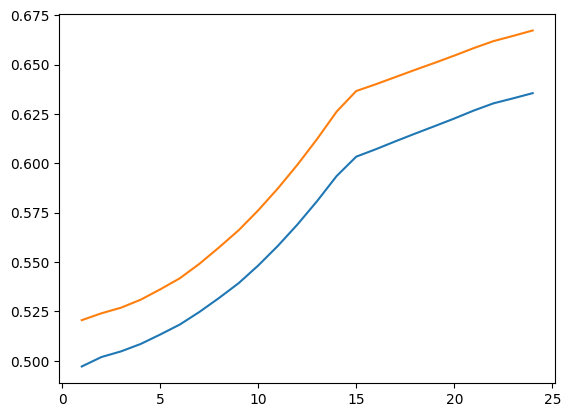

In [78]:
poly = PolynomialFeatures(2, include_bias=False)

x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.fit_transform(x_test)

alphas = [ i for i in range(1, 25)]

errs_train = []
errs_test = []

for alpha in alphas:
    model = Lasso(alpha, max_iter=7000)
    model.fit(x_train_trans, y_train)
    y_train_predict = model.predict(x_train_trans)
    y_test_predict = model.predict(x_test_trans)

    errs_train.append(mean_squared_error(y_train, y_train_predict))
    errs_test.append(mean_squared_error(y_test, y_test_predict))



plt.plot(alphas, errs_train)
plt.plot(alphas, errs_test)
print(np.argmin(errs_test))
print(np.min(errs_test))


/home/mislav/.local/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.96086e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/mislav/.local/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.04782e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/mislav/.local/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.16731e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/mislav/.local/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.33152e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/mislav/.local/lib/python3.11/site-packages/skl

0.435041892699629
14
30
0.6653389312994124


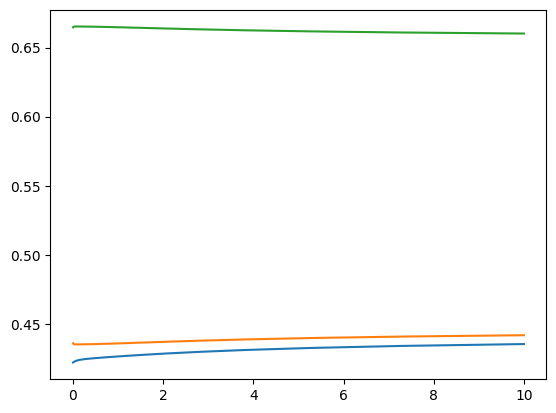

In [93]:
poly = PolynomialFeatures(2, include_bias=False)

x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.fit_transform(x_test)

alphas = np.logspace(-3, 1, 30)

errs_train = []
errs_test = []
rs = []

for alpha in alphas:
    model = Ridge(alpha)
    model.fit(x_train_trans, y_train)
    y_train_predict = model.predict(x_train_trans)
    y_test_predict = model.predict(x_test_trans)

    errs_train.append(mean_squared_error(y_train, y_train_predict))
    errs_test.append(mean_squared_error(y_test, y_test_predict))
    rs.append(model.score(x_test_trans, y_test))



plt.plot(alphas, errs_train)
plt.plot(alphas, errs_test)
plt.plot(alphas, rs)

print(np.min(errs_test))
print(np.argmin(errs_test))
print(len(errs_test))
print(np.max(rs))


0.6653389312994124
0.435041892699629
0.45974412857308933
0.08531678524172806


/home/mislav/.local/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.77157e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


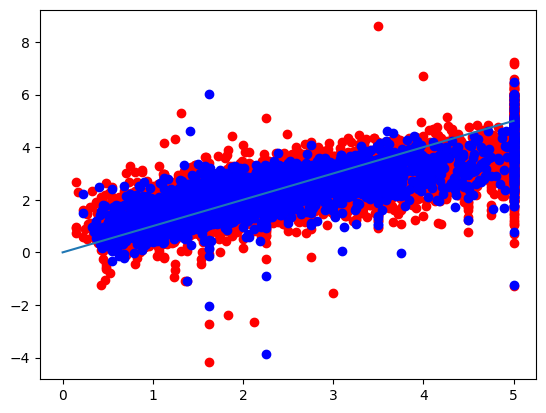

In [98]:
model = Ridge(alpha=alphas[np.argmin(errs_test)])

model.fit(x_train_trans, y_train)
model.coef_
print(model.score(x_test_trans, y_test))
print(mean_squared_error(y_test, model.predict(x_test_trans)))
print(mean_absolute_error(y_test, model.predict(x_test_trans)))
print(alphas[np.argmin(errs_test)])

plt.scatter(
    y_train,
    model.predict(x_train_trans),
    c='red'
)

plt.scatter(
    y_test,
    model.predict(x_test_trans),
    c='blue'
)

plt.plot(
  np.linspace(0,5,100),
  np.linspace(0,5,100)
)